In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import curve_fit

[ 30.50415846  25.2908772  -21.71403244]


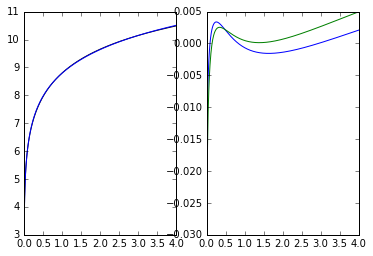

In [40]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=None)
D_L = cosmo.luminosity_distance

def func(x, a, b, c):
    return a * x**(1./b) + c
z = np.linspace(0.01, 4, 500)
dl = np.log(D_L(z).value)
popt, pcov = curve_fit(func, z, dl)
dl2 = func(z, *popt)
print popt
dl3 = 30.5 * z**0.04 - 21.7

fig, axs = plt.subplots(1, 2)
axs[0].plot(z, dl, 'k')
axs[0].plot(z, dl2, 'b')
#axs[0].set_yscale('log')
axs[1].plot(z, dl2/dl-1)
axs[1].plot(z, dl3/dl-1)